# Exploratory Data Analysis (EDA) for Resume Classification

## **Exploratory Data Analysis (EDA) on for Resume Classification**  
## **Index**  

### **1. Introduction**  
#### Overview  
- [b](#overview-of-the-dataset)  
- [Objective of the EDA](#objective-of-the-eda)  

### **2. Data Loading and Initial Exploration**  
#### Data Import & Structure  
- [Importing Required Libraries](#importing-required-libraries)  
- [Loading the Dataset](#loading-the-dataset)  
- [Previewing the Dataset](#previewing-the-dataset)  
- [Dataset Shape](#dataset-shape)  
- [Data Types Overview](#data-types-overview)  
- [Basic Statistical Summary](#basic-statistical-summary)  
- [Column Descriptions](#column-descriptions)  
- [Data Dictionary](#data-dictionary)  

### **3. Data Cleaning**  
#### Handling Issues  
- [Handling Missing Values](#handling-missing-values)  
- [Removing Duplicates](#removing-duplicates)  
- [Data Type Conversion](#data-type-conversion)  
- [Outlier Detection](#outlier-detection)  

### **4. Feature Engineering**  
#### Creating & Transforming Features  
- [Creating New Features](#creating-new-features)  

### **5. Univariate Analysis**  
#### Individual Column Analysis  
- [Categorical Columns](#categorical-columns)  
- [Numerical Columns](#numerical-columns)  

### **6. Bivariate Analysis**  
#### Relationship Betwen Two Variables  
- [Categorical vs. Numerical](#categoical-vs-numerical)  
- [Numerical vs. Numerical](#numerical-vs-numerical
#### Relationship Between Multiple Variables

### **7. Multivariate Analysis**  
##
- [Time Trend of Pesticide Levels](#time-trend-of-pesticide-levels)
- [Pesticide Residue Levels Across Top 10 Retailers](#pesticid
- [Correlation Heatmap](Correlation-Heatmap)tacked Bar Charts](#stacked-bar-charts)  

### **8. Key Insights from EDA**  
#### -  Key Insihts from ED


# **1. Introduction** 

## **Overview of the Dataset**

 Resume Screening and Classification with Natural Language Processing Improved A resume screener application that can be used to automatically categorize resumes in various subjects according to their content. The dataset of this project is a set of resumes that are stored as PDF documents, which are extracted into a structured CSV file 

## **Objective of the EDA**

# **2. Data Loading and Initial Exploration** 

## **Importing Required Libraries**

In [3]:
import Warning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\kuldeep
[nltk_data]     verma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Dictionary

**Text** : The full plain text extracted from each resume PDF. It may include education, experience, skills, etc

**Label** : he job category the resume belongs to. This is the target class for classification.

## **Loading the Dataset**

In [23]:
df = pd.read_csv("../data/processed/resume_data.csv")

## **Previewing the Dataset**

In [24]:
df.head()

,resume_text,job_role
0,ACCOUNTANT\nSummary\nFinancial Accountant spec...,ACCOUNTANT
1,STAFF ACCOUNTANT\nSummary\nHighly analytical a...,ACCOUNTANT
2,ACCOUNTANT\nProfessional Summary\nTo obtain a ...,ACCOUNTANT
3,SENIOR ACCOUNTANT\nExperience\nCompany Name Ju...,ACCOUNTANT
4,SENIOR ACCOUNTANT\nProfessional Summary\nSenio...,ACCOUNTANT


## **Dataset Shape**

In [25]:
df.shape

(2484, 2)

In our data we have 2484 row and 2 column

## **Data Types Overview**

## Dataset Overview

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  2483 non-null   object
 1   job_role     2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


We have one null value in our resume_text column 

In [27]:
df.describe(include='object')

,resume_text,job_role
count,2483,2484
unique,2481,24
top,STOREKEEPER II\nProfessional Summary\nThe purp...,INFORMATION-TECHNOLOGY
freq,2,120


In [22]:
df['job_role'].value_counts()

job_role
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      119
ACCOUNTANT                118
ADVOCATE                  118
ENGINEERING               118
CHEF                      118
FITNESS                   117
FINANCE                   117
SALES                     116
AVIATION                  116
HEALTHCARE                115
CONSULTANT                115
BANKING                   115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

we have 2481 unique value in our resume_text column out of 2483 that means we have 2 duplicate resume text in resume_text column  and I job_role we have 24 unique category of job_role with Information Technology hase highest count with 120

## Check for Missing


In [28]:
df.isnull().sum()

resume_text    1
job_role       0
dtype: int64

We have one null value in resume text column 

In [29]:
df = df.dropna()

Now we have remove null value beacuse we have only one null value in resume_text column and to fill these value is not possible and not a correct approch so we have remove it

## Check for Duplicate Data

In [32]:
df.duplicated().sum()

2

we have found 2 duplicate value so we have remove these duplicate 

In [33]:
df = df.drop_duplicates()

In [34]:
df

,resume_text,job_role
0,ACCOUNTANT\nSummary\nFinancial Accountant spec...,ACCOUNTANT
1,STAFF ACCOUNTANT\nSummary\nHighly analytical a...,ACCOUNTANT
2,ACCOUNTANT\nProfessional Summary\nTo obtain a ...,ACCOUNTANT
3,SENIOR ACCOUNTANT\nExperience\nCompany Name Ju...,ACCOUNTANT
4,SENIOR ACCOUNTANT\nProfessional Summary\nSenio...,ACCOUNTANT
...,...,...
2479,READING TEACHER\nSummary\nI am a highly motiva...,TEACHER
2480,HISTORY TEACHER\nProfessional Summary\nTo be e...,TEACHER
2481,"TEACHER\nSummary\nHighly ethical, dependable, ...",TEACHER
2482,TEACHER\nSummary\nTalented early education pro...,TEACHER


## Resume Length Analysis

### Word Count

In [35]:
df['text_length'] = df['resume_text'].apply(lambda x: len(str(x).split()))
df['char_length'] = df['resume_text'].apply(lambda x: len(str(x)))
df[['text_length', 'char_length']].describe()

C:\Users\kuldeep verma\AppData\Local\Temp\ipykernel_24928\1035876589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_length'] = df['resume_text'].apply(lambda x: len(str(x).split()))
C:\Users\kuldeep verma\AppData\Local\Temp\ipykernel_24928\1035876589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['char_length'] = df['resume_text'].apply(lambda x: len(str(x)))


,text_length,char_length
count,2481.00000,2481.000000
mean,812.71705,5941.433293
std,361.94502,2626.776418
min,113.00000,692.000000
25%,653.00000,4832.000000
50%,760.00000,5559.000000
75%,937.00000,6867.000000
max,5190.00000,35132.000000


about Word : maximun word in any 

### Visualize Word Count Distribution

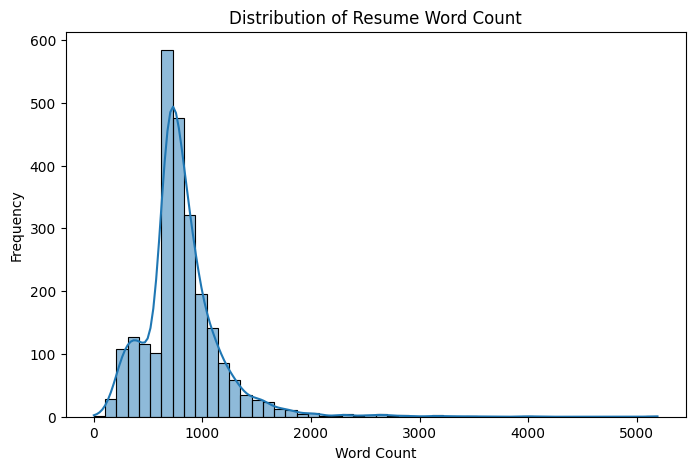

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribution of Resume Word Count")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

The most of the word count in a one doc is around 1000

## Label (Category) Distribution

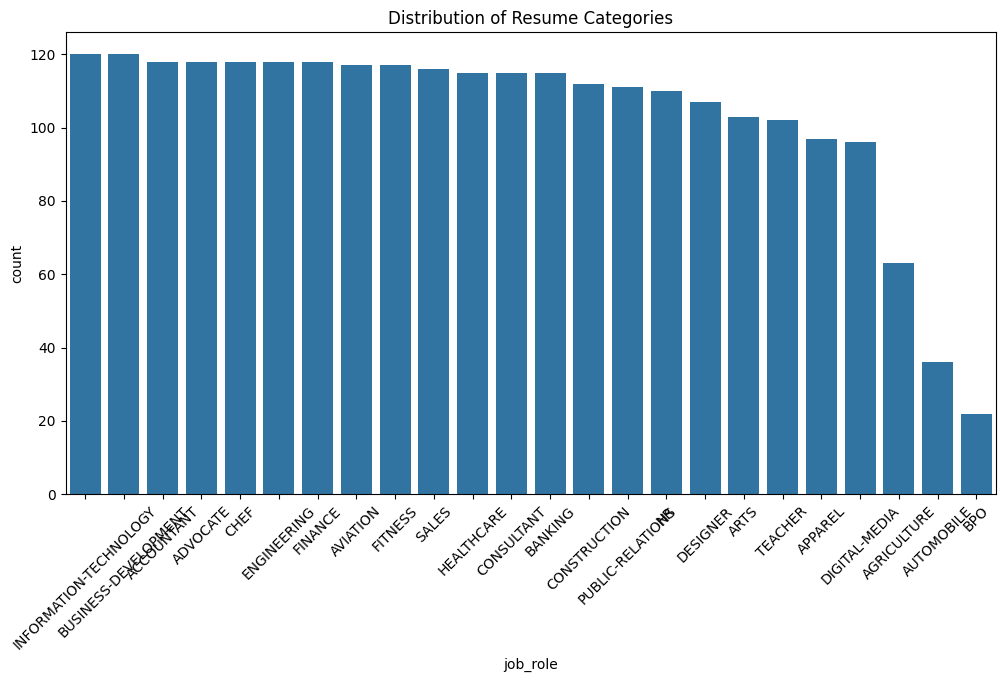

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='job_role', order=df['job_role'].value_counts().index)
plt.title("Distribution of Resume Categories")
plt.xticks(rotation=45)
plt.show()


- Information Technology ,Buisness Development,Accountant are most count in resume data with around 120 counts
- BPO,Automobile,Agriculture,digital Media low count in resume data with less than 60 

## Common Words in Resumes

In [19]:
stop_words = set(stopwords.words('english'))

def get_top_words(texts, n=15):
    all_words = " ".join(texts).lower()
    all_words = all_words.translate(str.maketrans('', '', string.punctuation)).split()
    words = [word for word in all_words if word not in stop_words]
    return Counter(words).most_common(n)

### Top Words Per Category

In [22]:
for label in df['job_role'].unique():
    top_words = get_top_words(df[df['job_role'] == label]['resume_text'], n=10)
    print(f"\nTop words in {label} resumes:")
    print(top_words)


Top words in ACCOUNTANT resumes:
[('accounting', 1207), ('financial', 1072), ('accounts', 792), ('state', 773), ('company', 719), ('city', 677), ('management', 575), ('name', 546), ('accountant', 520), ('reports', 470)]

Top words in ADVOCATE resumes:
[('state', 916), ('city', 831), ('company', 722), ('customer', 717), ('name', 620), ('service', 525), ('skills', 506), ('management', 471), ('ï¼\u200b', 414), ('sales', 330)]

Top words in AGRICULTURE resumes:
[('state', 465), ('city', 400), ('company', 339), ('name', 306), ('management', 277), ('skills', 199), ('development', 196), ('program', 171), ('education', 169), ('project', 166)]

Top words in APPAREL resumes:
[('state', 738), ('city', 728), ('company', 716), ('sales', 636), ('name', 573), ('customer', 445), ('ï¼\u200b', 417), ('product', 314), ('store', 310), ('management', 308)]

Top words in ARTS resumes:
[('state', 717), ('city', 629), ('company', 511), ('name', 456), ('arts', 432), ('students', 397), ('â', 394), ('skills', 3

TypeError: sequence item 13: expected str instance, float found

## Word Cloud Visualization

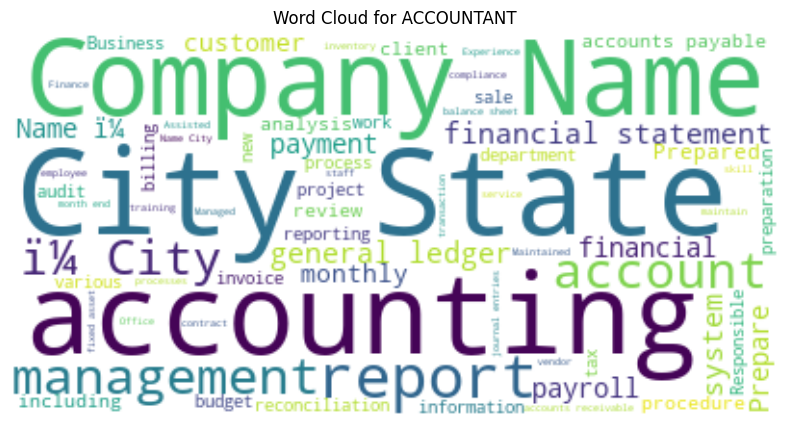

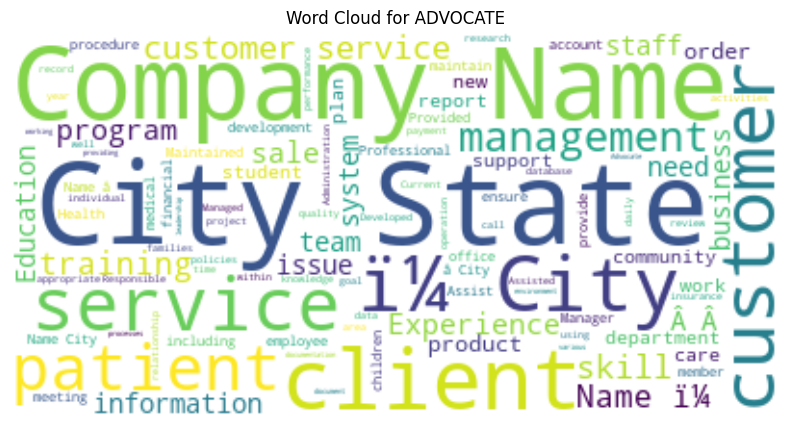

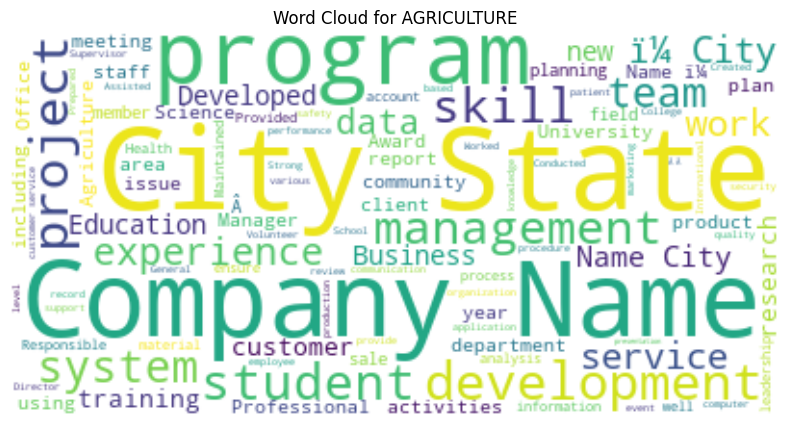

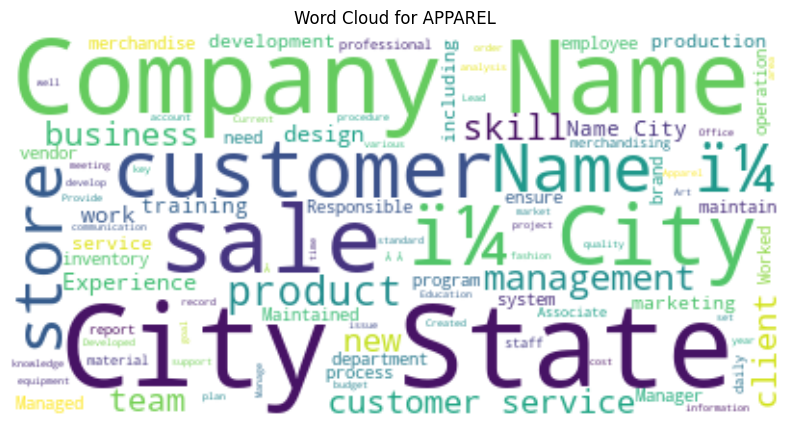

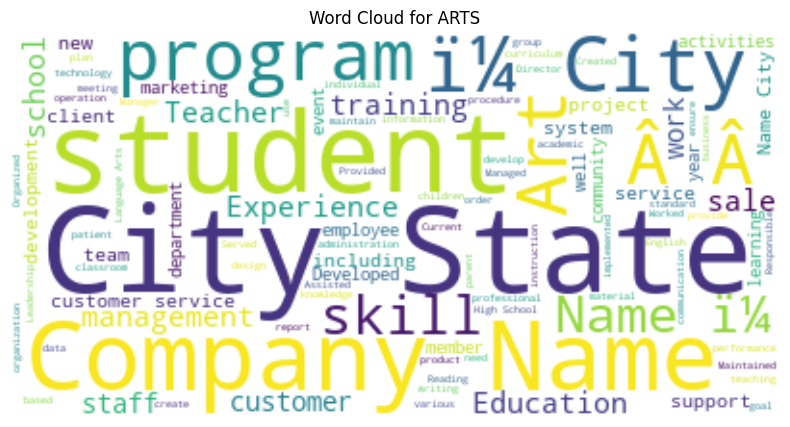

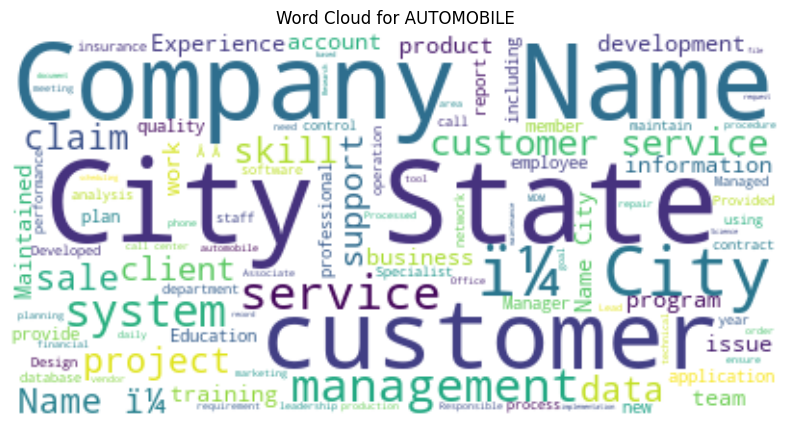

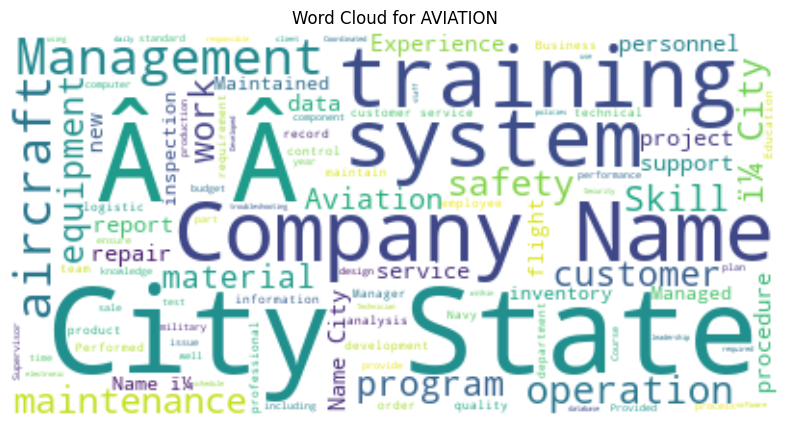

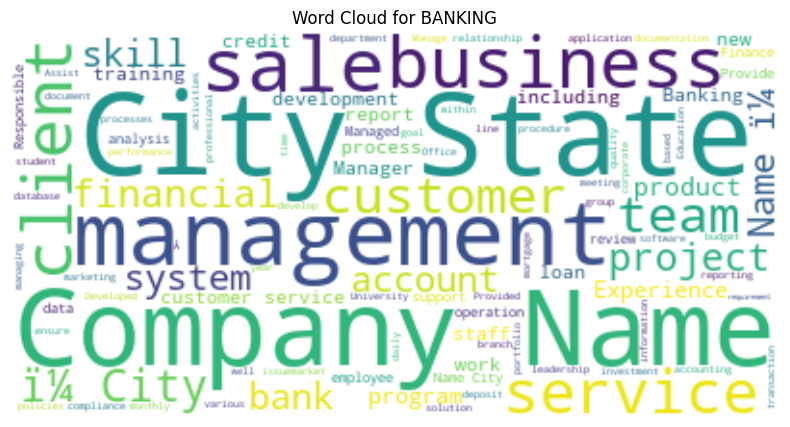

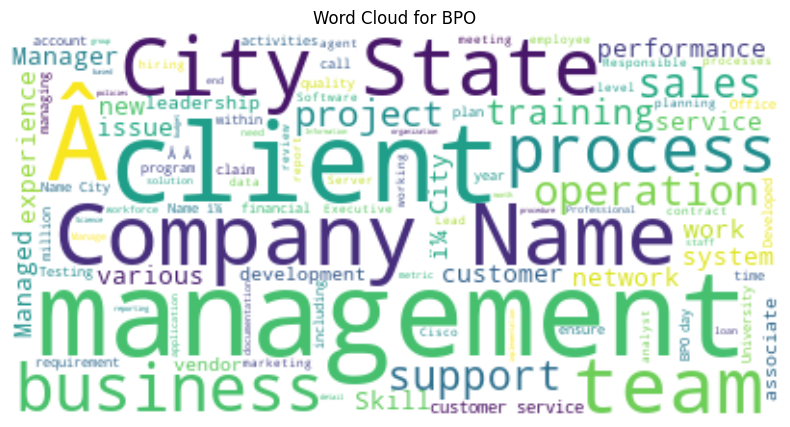

TypeError: sequence item 13: expected str instance, float found

In [25]:
for label in df['job_role'].unique():
    text = " ".join(df[df['job_role'] == label]['resume_text'])
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', max_words=100).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {label}")
    plt.show()


## Correlation Between Text Length and Label

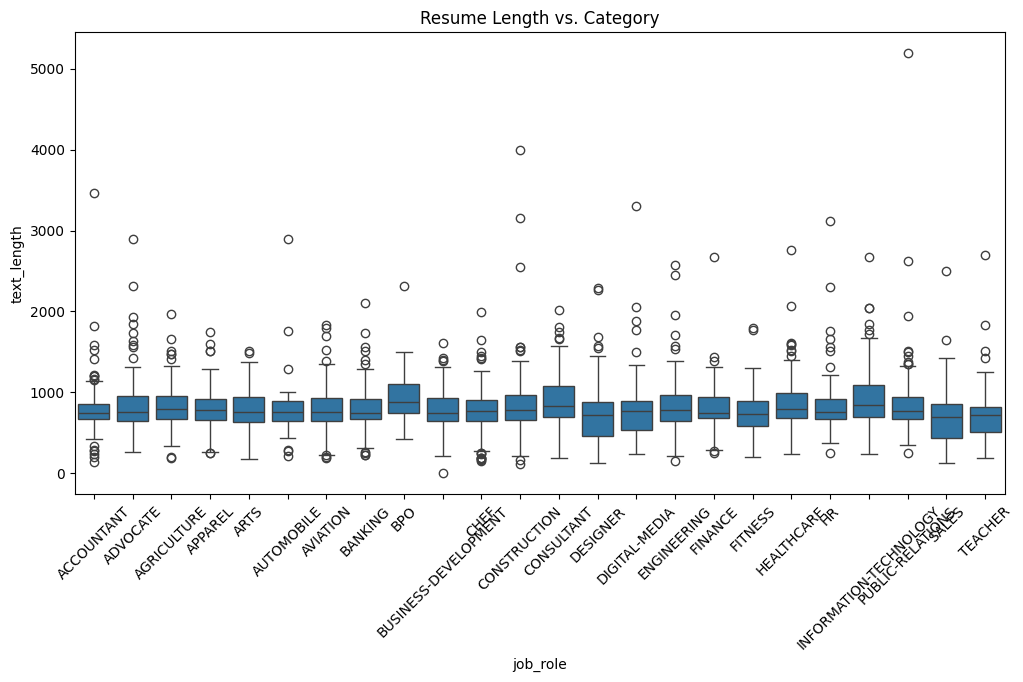

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(x='job_role', y='text_length', data=df)
plt.xticks(rotation=45)
plt.title("Resume Length vs. Category")
plt.show()


## Conclusion

## **Data Import & Structure**